<a href="https://colab.research.google.com/github/abhinav-m/data-science-bootcamp/blob/master/Udemy-Machine-Learning-A-Z/Part-2-Regression/Part-2-4-Support-Vector-Regression/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
# Printing X
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
# Print y
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
# Need to reshape y to a 2d array for standard scaler to work(expects 2d array as I/P)
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
# Can't fit same object on both X and y since it 'fits' on basis of mean and SD
X = sc_x.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [8]:
# Scaled features and dependant variables
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [10]:
# Have to apply scaling before predicting because trained on scaled values
# Since output will always be scaled, need to reverse scaling too.
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) 

array([170370.0204065])

## Visualising the SVR results

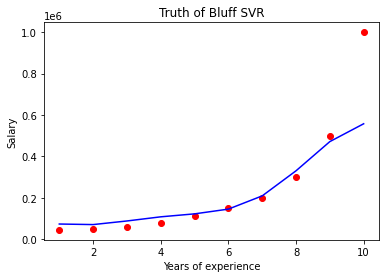

In [15]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Truth of Bluff SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

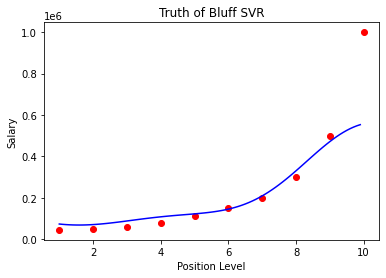

In [21]:
X_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))),color='blue')
plt.title('Truth of Bluff SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
